## Apply

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df = pd.DataFrame(data=[{"a":1,"b":2},{"a":2,"b":3},{"a":4,"b":6}])

In [3]:
df

,a,b
0,1,2
1,2,3
2,4,6


In [4]:
df['c'] = df['b'].apply(lambda x: x*2)

In [5]:
df

,a,b,c
0,1,2,4
1,2,3,6
2,4,6,12


In [6]:
def square(number):
    return number**2
df['d'] = df['a'].apply(square)

In [7]:
df

,a,b,c,d
0,1,2,4,1
1,2,3,6,4
2,4,6,12,16


## Advanced Visualization

In [8]:
from PIL import Image # converting images into arrays

In [3]:
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.shape

(195, 43)

In [6]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

In [7]:
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

In [8]:
df_can.columns = list(map(str, df_can.columns))

In [9]:
df_can.set_index('Country', inplace = True)

In [10]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  195 non-null    object
 1   Region     195 non-null    object
 2   DevName    195 non-null    object
 3   1980       195 non-null    int64 
 4   1981       195 non-null    int64 
 5   1982       195 non-null    int64 
 6   1983       195 non-null    int64 
 7   1984       195 non-null    int64 
 8   1985       195 non-null    int64 
 9   1986       195 non-null    int64 
 10  1987       195 non-null    int64 
 11  1988       195 non-null    int64 
 12  1989       195 non-null    int64 
 13  1990       195 non-null    int64 
 14  1991       195 non-null    int64 
 15  1992       195 non-null    int64 
 16  1993       195 non-null    int64 
 17  1994       195 non-null    int64 
 18  1995       195 non-null    int64 
 19  1996       195 non-null    int64 
 20  1997       195 non-nul

In [11]:
df_can['Total'] =  df_can.sum(axis = 1)

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [12]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [13]:
years = list(map(str, range(1980, 2014)))

In [22]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [21]:
mpl.style.use('ggplot')

### Waffle Chart

Menyajikan proporsi dalam bentuk lain selain pie chart

In [22]:
df_waffle = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

In [23]:
df_waffle

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


#### Step 1 Calculate proportions for each category

In [24]:
total = df_waffle['Total'].sum()

In [25]:
proportion = []
for index, row in df_waffle.iterrows():
    print(index, row['Total'])
    proportion.append(row['Total']/total)

Denmark 3901
Norway 2327
Sweden 5866


In [26]:
proportion

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [27]:
total

12094

#### Step 2 Determine waffle size

In [28]:
width = 40
height = 10
tile_size = width * height
tile_size

400

#### Step 3 Calculate number of tiles for each category

In [29]:
tile_per_category = [round(prop*tile_size) for prop in proportion]

In [30]:
tile_per_category

[129, 77, 194]

In [31]:
np.sum(tile_per_category)

400

#### Step 4 Populate Matrix

In [32]:
mat = np.zeros((height,width))

In [33]:
mat.shape

(10, 40)

In [34]:
mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

In [35]:
idx = 0
tiles_planted = 0
for col in range(width):
    for row in range(height):
        if tiles_planted >= tile_per_category[idx]:
            idx += 1
            tiles_planted = 0
        mat[row,col] = idx
        tiles_planted += 1

In [36]:
np.unique(mat, return_counts=True)

(array([0., 1., 2.]), array([129,  77, 194], dtype=int64))

In [37]:
mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
   

#### Step 5 Construct Plot

<Figure size 432x288 with 0 Axes>

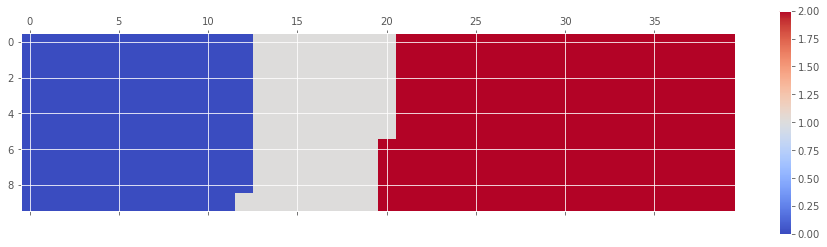

In [38]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(mat, cmap=colormap)
plt.colorbar()
plt.show()

#### Step 6 Styling Chart

<Figure size 432x288 with 0 Axes>

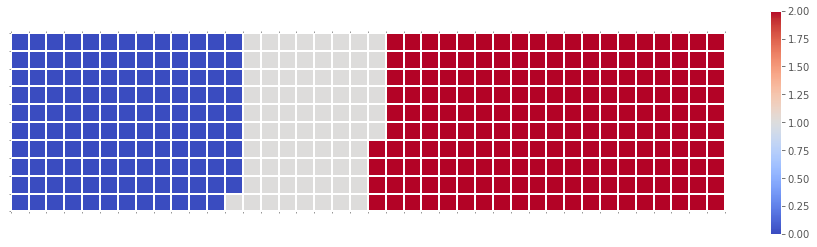

In [39]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(mat, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

plt.show()

#### Step 7 Add Legend

<Figure size 432x288 with 0 Axes>

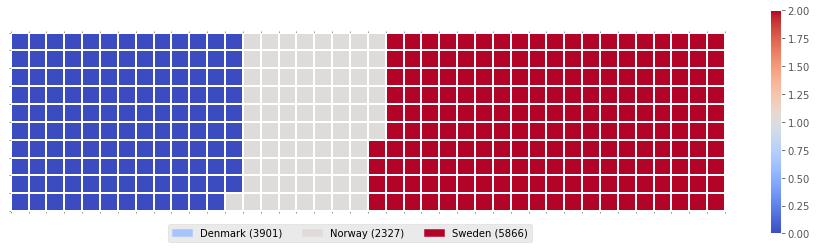

In [40]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(mat, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_waffle['Total'])
legend_handles = []
for i, category in enumerate(df_waffle.index.values):
    label_str = category + ' (' + str(df_waffle['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
plt.legend(handles=legend_handles, loc='lower center', ncol=len(df_waffle.index.values), bbox_to_anchor=(0., -0.2, 0.95, .1))
plt.show()

In [41]:
for i, category in enumerate(df_waffle.index.values):
    print(i, category)

0 Denmark
1 Norway
2 Sweden


In [42]:
df_waffle['Total'][0]

3901

### Word Clouds

In [1]:
from wordcloud import WordCloud, STOPWORDS

In [95]:
alice_novel = open('alice_novel.txt', 'r').read()

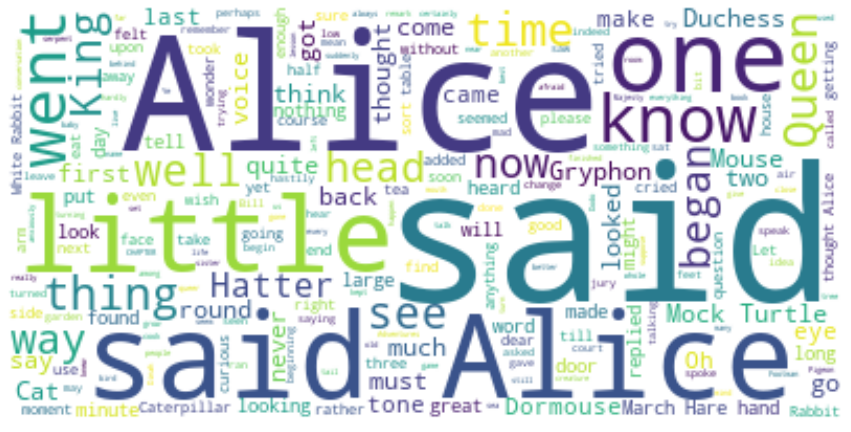

In [112]:
stopwords = set(STOPWORDS)
alice_wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
alice_wc.generate(alice_novel)
plt.figure(figsize=(15,10))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [97]:
stopwords.add('said')

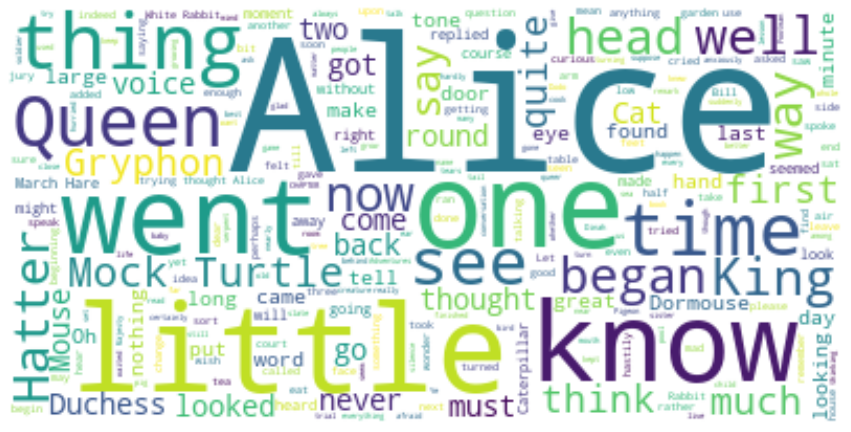

In [98]:
alice_wc.generate(alice_novel)
plt.figure(figsize=(15,10))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [99]:
alice_mask = np.array(Image.open('alice_mask.png'))

In [100]:
alice_mask.shape

(900, 900)

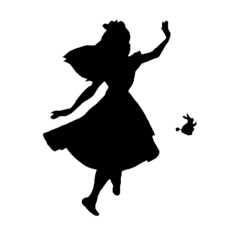

In [101]:
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

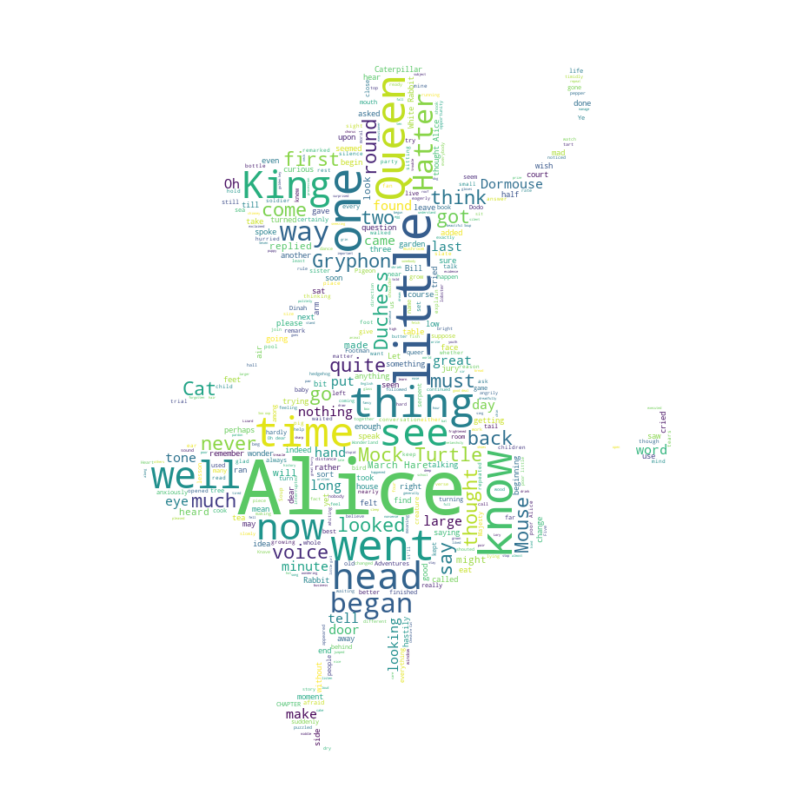

In [103]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Wordcloud for immigration data

In [14]:
df_can['Total'].sum()

6409153

In [15]:
total_immigrant = df_can['Total'].sum()
total_immigrant

6409153

In [24]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total'])/total_immigrant*max_words
        print(repeat_num_times)
        word_string += (country+ ' ') * int(repeat_num_times)

0.8234332992206614
0.22045190682762605
0.975091404433628
0.00021063625724023128
0.029671627436573915
0.27517520645863813
0.04648040076434437
0.3346167582518314
0.07000144948950353
0.037198363028624844
0.011346273056673791
0.006670148145940656
0.920733207648499
0.09721565392494141
0.1119882767660563
0.15112449336129127
0.015207937772744698
0.04004897370994264
0.08251324316957327
0.005560797191142106
0.4164840502325346
0.32732874375131943
0.11388400308121839
0.09180932332244213
0.22497356514971636
0.000280848342986975
0.023212115547873488
0.29993198789294
9.267461706718501
1.0122897674622529
0.002724228926973658
0.023675515313801996
0.11235337961193936
0.2859738252464873
0.015811761710166697
0.05477946929960948
0.023113818627828044
0.03468477035889141
0.17178088898798327
1.0215156355293749
0.14674325921069448
0.013129660034641083
0.49339436895951777
0.2894001750309284
0.03905196209233888
1.5319013292396046
0.013368381126180013
0.008467577541057297
0.029039718664853217
0.8974789648491774


In [25]:
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [26]:
wordcloud = WordCloud(background_color='white').generate(word_string)

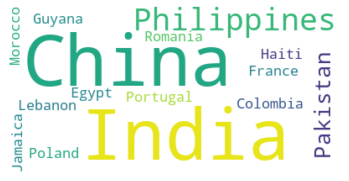

In [27]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Regression Plot

In [55]:
import seaborn as sns

In [56]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [57]:
df_total = pd.DataFrame(df_can[years].sum(axis=0))

In [58]:
df_total.reset_index(inplace=True)

In [59]:
df_total.columns = ['year','total']

In [60]:
df_total['year'] = df_total['year'].apply(float)

In [61]:
df_total['total'] = df_total['total'].apply(float)

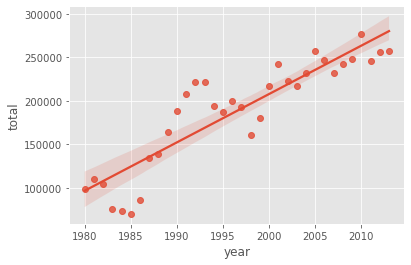

In [62]:
ax = sns.regplot(x='year', y='total', data=df_total)

### Folium

In [63]:
import folium

In [64]:
world_map = folium.Map()

In [65]:
world_map

In [118]:
folium.Map(location=[37.524992, 127.050425])

In [66]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=10)
world_map

In [67]:
kuta = folium.Map(location=[-8.7232, 115.1534], zoom_start=12)
kuta

In [68]:
kuta = folium.Map(location=[-8.7232, 115.1534], zoom_start=12, tiles='Stamen Toner')
kuta
### Peta buta

In [69]:
kuta = folium.Map(location=[-8.7232, 115.1534], zoom_start=12, tiles='Stamen Terrain')
kuta
### Peternakan

#### Visualize Maps with Marker

In [75]:
df_criminal = pd.read_csv('PoliceDepartmentIncidents-PreviousYear2016.csv')

In [76]:
df_criminal.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,1/29/2016 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,1/29/2016 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,4/25/2016 0:00,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,1/5/2016 0:00,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600140e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,1/1/2016 0:00,0:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600030e+13


1. IncidntNum: Incident Number
2. Category: Category of crime or incident
3. Descript: Description of the crime or incident
4. DayOfWeek: The day of week on which the incident occurred
5. Date: The Date on which the incident occurred
6. Time: The time of day on which the incident occurred
7. PdDistrict: The police department district
8. Resolution: The resolution of the crime in terms whether the perpetrator was arrested or not
9. Address: The closest address to where the incident took place
10. X: The longitude value of the crime location
11. Y: The latitude value of the crime location
12. Location: A tuple of the latitude and the longitude values
13. PdId: The police department ID

In [77]:
limit = 100
df_criminal = df_criminal.iloc[0:limit, :]

In [78]:
latitude = 37.77
longitude = -122.42
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [79]:
incidents = folium.map.FeatureGroup()

for lat, long in zip(df_criminal.Y, df_criminal.X):
    incidents.add_child(
        folium.CircleMarker(
        [lat,long],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            opacity=0.6
        )
    )

sanfran_map.add_child(incidents)

In [80]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_criminal.Y, df_criminal.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_criminal.Y)
longitudes = list(df_criminal.X)
labels = list(df_criminal.Category)

for lat, long, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, long], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [81]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_criminal.Y, df_criminal.X, df_criminal.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [82]:
from folium import plugins

In [83]:
# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, long, label, in zip(df_criminal.Y, df_criminal.X, df_criminal.Category):
    folium.Marker(
        location=[lat, long],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

### Choropleth Maps

In [84]:
citizen = df_can.copy()

In [85]:
citizen.reset_index(inplace=True)

In [86]:
world_geo = r'world_countries.json'

world_map = folium.Map(location=[0, 0], zoom_start=2)

world_map.choropleth(
    geo_data=world_geo,
    data=citizen,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [87]:
world_map

In [113]:
301-150

151